In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
import warnings
warnings.filterwarnings("ignore")

1. Loading dataset

In [2]:
data = pd.read_csv('penguins_size.csv')

2. Data Processing 

2.a.i) Examining the first 10 rows of dataset

In [3]:
data.head(10)

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,MALE
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,FEMALE
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,FEMALE
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,FEMALE
5,Adelie,Torgersen,39.3,20.6,190.0,3650.0,MALE
6,Adelie,Torgersen,38.9,17.8,181.0,3625.0,FEMALE
7,Adelie,Torgersen,39.2,19.6,195.0,4675.0,MALE
8,Adelie,Torgersen,34.1,18.1,193.0,3475.0,NaN
9,Adelie,Torgersen,42.0,20.2,190.0,4250.0,NaN


By returning the first 10 rows of dataset it shows the Adelie species living in Torgersen Island and different measurement of this species. and also there some missing value in measumebt and some Gender of penguin species which is not specified.

a.ii) Reviewing last 10 rows

In [4]:
data.tail(10)

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
334,Gentoo,Biscoe,46.2,14.1,217.0,4375.0,FEMALE
335,Gentoo,Biscoe,55.1,16.0,230.0,5850.0,MALE
336,Gentoo,Biscoe,44.5,15.7,217.0,4875.0,NaN
337,Gentoo,Biscoe,48.8,16.2,222.0,6000.0,MALE
338,Gentoo,Biscoe,47.2,13.7,214.0,4925.0,FEMALE
339,Gentoo,Biscoe,NaN,NaN,NaN,NaN,.
340,Gentoo,Biscoe,46.8,14.3,215.0,4850.0,FEMALE
341,Gentoo,Biscoe,50.4,15.7,222.0,5750.0,MALE
342,Gentoo,Biscoe,45.2,14.8,212.0,5200.0,FEMALE
343,Gentoo,Biscoe,49.9,16.1,213.0,5400.0,MALE


By visualizing the last 10 rows in dataframe contain species Gentoo and island is the same Biscoe with different measurement and the gender (sex) of species. however there are different cell which missing values and contain NaN value.

a.iii)  Displaying Summary of dataset

In [5]:
display(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 344 entries, 0 to 343
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   species            344 non-null    object 
 1   island             344 non-null    object 
 2   culmen_length_mm   342 non-null    float64
 3   culmen_depth_mm    342 non-null    float64
 4   flipper_length_mm  342 non-null    float64
 5   body_mass_g        342 non-null    float64
 6   sex                334 non-null    object 
dtypes: float64(4), object(3)
memory usage: 18.9+ KB


None

The printed information about dataframe contain number of rangeindex(rows) equal to 344 with 7 columns. And it display header of each column with their dataype where species, island, sex are string(object) and other column contain values float 64. in non null count shows counted number of non missing value in each column.

a.iv) Identifying missing values in dataset

In [6]:
data.isnull().sum()

species               0
island                0
culmen_length_mm      2
culmen_depth_mm       2
flipper_length_mm     2
body_mass_g           2
sex                  10
dtype: int64

By identifying the missing value sex is the column with 11 missing value and other column contain 2 Nan except species, and island. This can help to determine which option could be suitable to handle missing value 

2.b) Handle Missing Value

b.i)

In [7]:
columns_df = data.select_dtypes(include=['number']).columns
data[columns_df] = data[columns_df].fillna(data[columns_df].mean())
data

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.10000,18.70000,181.000000,3750.000000,MALE
1,Adelie,Torgersen,39.50000,17.40000,186.000000,3800.000000,FEMALE
2,Adelie,Torgersen,40.30000,18.00000,195.000000,3250.000000,FEMALE
3,Adelie,Torgersen,43.92193,17.15117,200.915205,4201.754386,NaN
4,Adelie,Torgersen,36.70000,19.30000,193.000000,3450.000000,FEMALE
...,...,...,...,...,...,...,...
339,Gentoo,Biscoe,43.92193,17.15117,200.915205,4201.754386,.
340,Gentoo,Biscoe,46.80000,14.30000,215.000000,4850.000000,FEMALE
341,Gentoo,Biscoe,50.40000,15.70000,222.000000,5750.000000,MALE
342,Gentoo,Biscoe,45.20000,14.80000,212.000000,5200.000000,FEMALE


b.ii)

In [8]:
data.dtypes

species               object
island                object
culmen_length_mm     float64
culmen_depth_mm      float64
flipper_length_mm    float64
body_mass_g          float64
sex                   object
dtype: object

2.c) Checking for duplicate values

c.i, ii)

In [9]:
data_dup = data.duplicated()
data_dup.drop_duplicates()
print(data_dup)

0      False
1      False
2      False
3      False
4      False
       ...  
339    False
340    False
341    False
342    False
343    False
Length: 344, dtype: bool


3.

3.a)

In [10]:
data.describe()

,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g
count,344.000000,344.000000,344.000000,344.000000
mean,43.921930,17.151170,200.915205,4201.754386
std,5.443643,1.969027,14.020657,799.613058
min,32.100000,13.100000,172.000000,2700.000000
25%,39.275000,15.600000,190.000000,3550.000000
50%,44.250000,17.300000,197.000000,4050.000000
75%,48.500000,18.700000,213.000000,4750.000000
max,59.600000,21.500000,231.000000,6300.000000


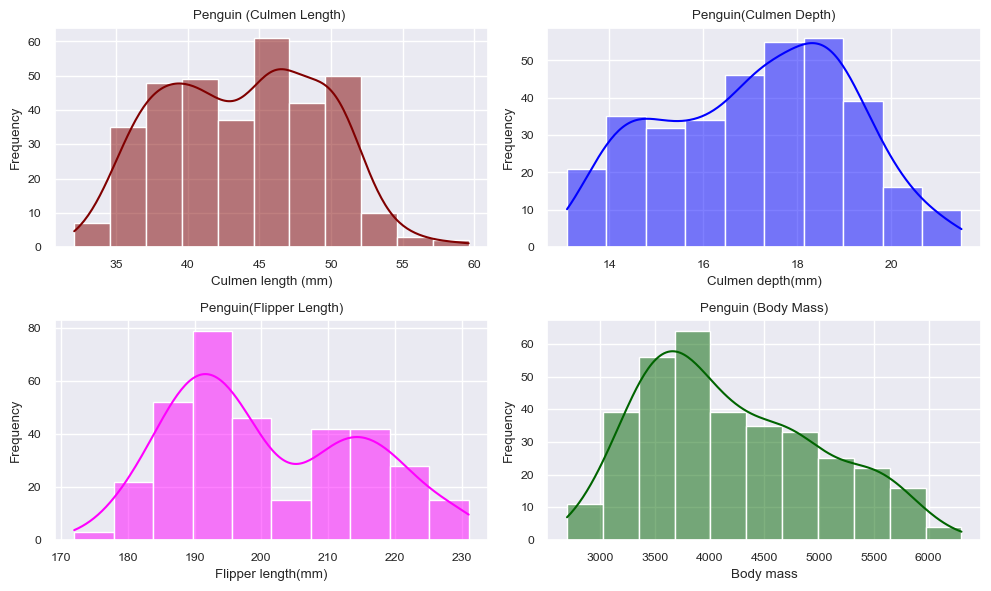

In [11]:
sns.set(style="darkgrid", font_scale=0.8)
plt.figure(figsize=(10, 6))

plt.subplot(2, 2, 1)
sns.histplot(data['culmen_length_mm'], kde=True , color = 'maroon')
plt.title('Penguin (Culmen Length) ')
plt.xlabel('Culmen length (mm)')
plt.ylabel('Frequency')

plt.subplot(2, 2, 2)
sns.histplot(data['culmen_depth_mm'], kde=True, color = 'blue')
plt.title('Penguin(Culmen Depth)')
plt.xlabel('Culmen depth(mm)')
plt.ylabel('Frequency')

plt.subplot(2, 2, 3)
sns.histplot(data['flipper_length_mm'], kde=True, color = 'magenta')
plt.title('Penguin(Flipper Length)')
plt.xlabel('Flipper length(mm)')
plt.ylabel('Frequency')

plt.subplot(2, 2, 4)
sns.histplot(data['body_mass_g'], kde=True, color = 'darkgreen')
plt.title('Penguin (Body Mass)')
plt.xlabel('Body mass')
plt.ylabel('Frequency')


plt.tight_layout()
plt.show()

In [12]:
data

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.10000,18.70000,181.000000,3750.000000,MALE
1,Adelie,Torgersen,39.50000,17.40000,186.000000,3800.000000,FEMALE
2,Adelie,Torgersen,40.30000,18.00000,195.000000,3250.000000,FEMALE
3,Adelie,Torgersen,43.92193,17.15117,200.915205,4201.754386,NaN
4,Adelie,Torgersen,36.70000,19.30000,193.000000,3450.000000,FEMALE
...,...,...,...,...,...,...,...
339,Gentoo,Biscoe,43.92193,17.15117,200.915205,4201.754386,.
340,Gentoo,Biscoe,46.80000,14.30000,215.000000,4850.000000,FEMALE
341,Gentoo,Biscoe,50.40000,15.70000,222.000000,5750.000000,MALE
342,Gentoo,Biscoe,45.20000,14.80000,212.000000,5200.000000,FEMALE


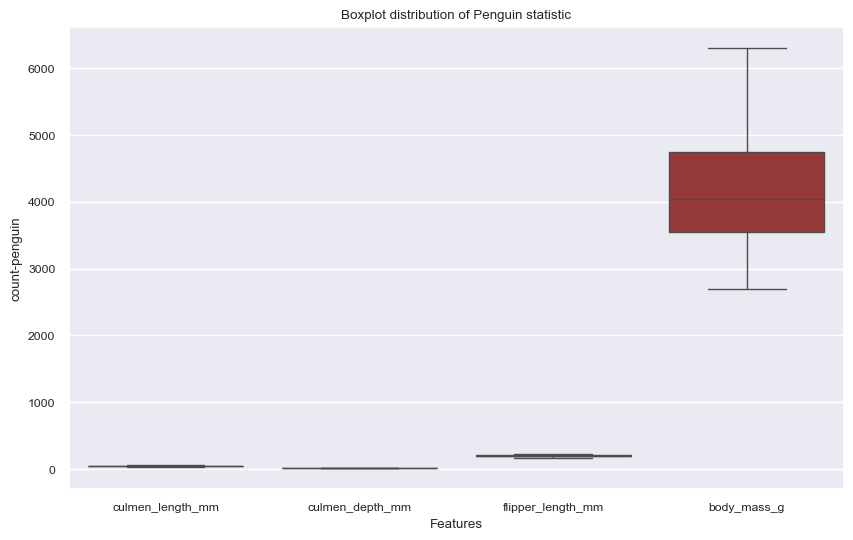

In [13]:
plt.figure(figsize = (10,6))
sns.boxplot(data = data, color = 'brown')

plt.title('Boxplot distribution of Penguin statistic')
plt.xlabel('Features')
plt.ylabel('count-penguin')
plt.show()

In [14]:
data

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.10000,18.70000,181.000000,3750.000000,MALE
1,Adelie,Torgersen,39.50000,17.40000,186.000000,3800.000000,FEMALE
2,Adelie,Torgersen,40.30000,18.00000,195.000000,3250.000000,FEMALE
3,Adelie,Torgersen,43.92193,17.15117,200.915205,4201.754386,NaN
4,Adelie,Torgersen,36.70000,19.30000,193.000000,3450.000000,FEMALE
...,...,...,...,...,...,...,...
339,Gentoo,Biscoe,43.92193,17.15117,200.915205,4201.754386,.
340,Gentoo,Biscoe,46.80000,14.30000,215.000000,4850.000000,FEMALE
341,Gentoo,Biscoe,50.40000,15.70000,222.000000,5750.000000,MALE
342,Gentoo,Biscoe,45.20000,14.80000,212.000000,5200.000000,FEMALE


3.b) Pairwise Correlation

,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g
culmen_length_mm,1.000000,-0.235053,0.656181,0.595110
culmen_depth_mm,-0.235053,1.000000,-0.583851,-0.471916
flipper_length_mm,0.656181,-0.583851,1.000000,0.871202
body_mass_g,0.595110,-0.471916,0.871202,1.000000


<function matplotlib.pyplot.show(close=None, block=None)>

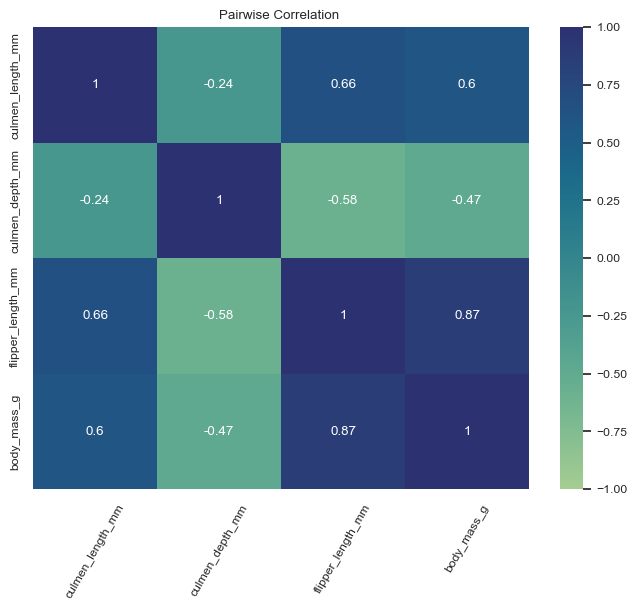

In [15]:
data_new = data[['culmen_length_mm','culmen_depth_mm','flipper_length_mm','body_mass_g']]
data_corr = data_new.corr()
display(data_corr)
plt.figure(figsize = (8,6))
sns.heatmap(data_corr, cmap = 'crest', annot = True, vmin = -1, vmax = 1)
plt.title('Pairwise Correlation ')
plt.xticks(rotation = 60)
plt.show

In [16]:
data

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.10000,18.70000,181.000000,3750.000000,MALE
1,Adelie,Torgersen,39.50000,17.40000,186.000000,3800.000000,FEMALE
2,Adelie,Torgersen,40.30000,18.00000,195.000000,3250.000000,FEMALE
3,Adelie,Torgersen,43.92193,17.15117,200.915205,4201.754386,NaN
4,Adelie,Torgersen,36.70000,19.30000,193.000000,3450.000000,FEMALE
...,...,...,...,...,...,...,...
339,Gentoo,Biscoe,43.92193,17.15117,200.915205,4201.754386,.
340,Gentoo,Biscoe,46.80000,14.30000,215.000000,4850.000000,FEMALE
341,Gentoo,Biscoe,50.40000,15.70000,222.000000,5750.000000,MALE
342,Gentoo,Biscoe,45.20000,14.80000,212.000000,5200.000000,FEMALE


3.c)

Species Statistics:
 species
Adelie       152
Gentoo       124
Chinstrap     68
Name: count, dtype: int64


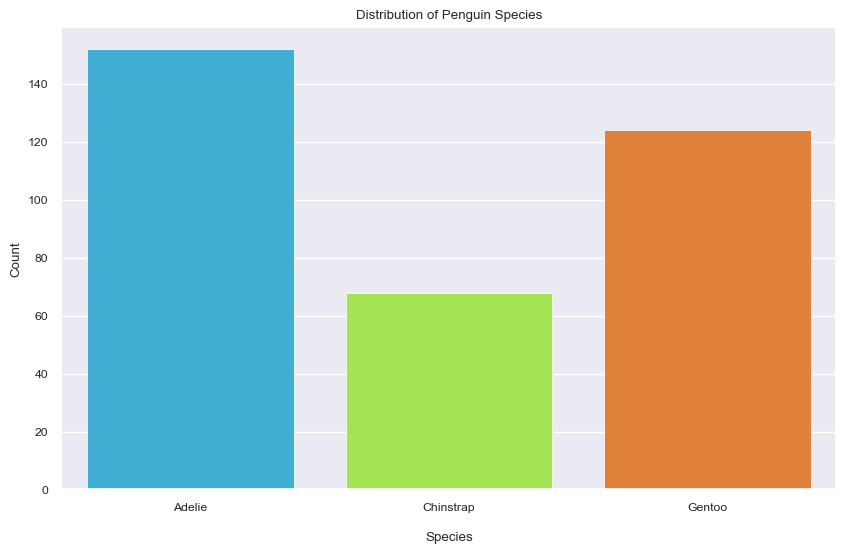

In [17]:
data_species = data['species'].value_counts()
print('Species Statistics:\n', data_species)

plt.figure(figsize=(10, 6))
sns.countplot(x='species', data=data, palette='turbo', linewidth=0.55)
plt.title('Distribution of Penguin Species')
plt.xlabel('\nSpecies')
plt.ylabel('Count')
plt.show()

In [18]:
data

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.10000,18.70000,181.000000,3750.000000,MALE
1,Adelie,Torgersen,39.50000,17.40000,186.000000,3800.000000,FEMALE
2,Adelie,Torgersen,40.30000,18.00000,195.000000,3250.000000,FEMALE
3,Adelie,Torgersen,43.92193,17.15117,200.915205,4201.754386,NaN
4,Adelie,Torgersen,36.70000,19.30000,193.000000,3450.000000,FEMALE
...,...,...,...,...,...,...,...
339,Gentoo,Biscoe,43.92193,17.15117,200.915205,4201.754386,.
340,Gentoo,Biscoe,46.80000,14.30000,215.000000,4850.000000,FEMALE
341,Gentoo,Biscoe,50.40000,15.70000,222.000000,5750.000000,MALE
342,Gentoo,Biscoe,45.20000,14.80000,212.000000,5200.000000,FEMALE


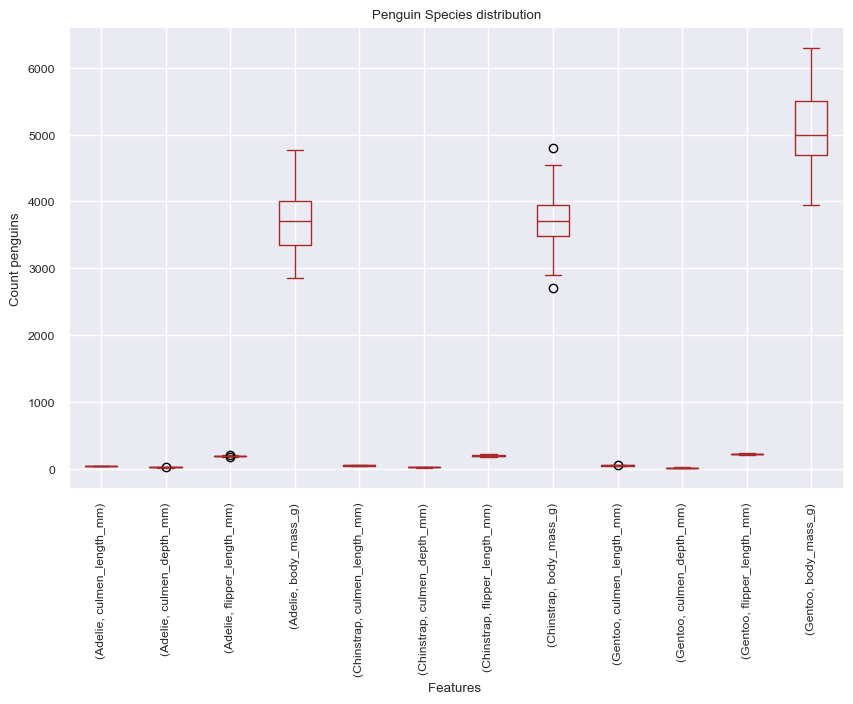

In [19]:
plt.figure(figsize = (10, 6))
data.groupby('species').boxplot(data_new, color = 'brown')
plt.xticks(rotation = 90)
plt.title('Penguin Species distribution')
plt.xlabel('Features ')
plt.ylabel('Count penguins')
plt.show()

In [20]:
data

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.10000,18.70000,181.000000,3750.000000,MALE
1,Adelie,Torgersen,39.50000,17.40000,186.000000,3800.000000,FEMALE
2,Adelie,Torgersen,40.30000,18.00000,195.000000,3250.000000,FEMALE
3,Adelie,Torgersen,43.92193,17.15117,200.915205,4201.754386,NaN
4,Adelie,Torgersen,36.70000,19.30000,193.000000,3450.000000,FEMALE
...,...,...,...,...,...,...,...
339,Gentoo,Biscoe,43.92193,17.15117,200.915205,4201.754386,.
340,Gentoo,Biscoe,46.80000,14.30000,215.000000,4850.000000,FEMALE
341,Gentoo,Biscoe,50.40000,15.70000,222.000000,5750.000000,MALE
342,Gentoo,Biscoe,45.20000,14.80000,212.000000,5200.000000,FEMALE


3.d)  

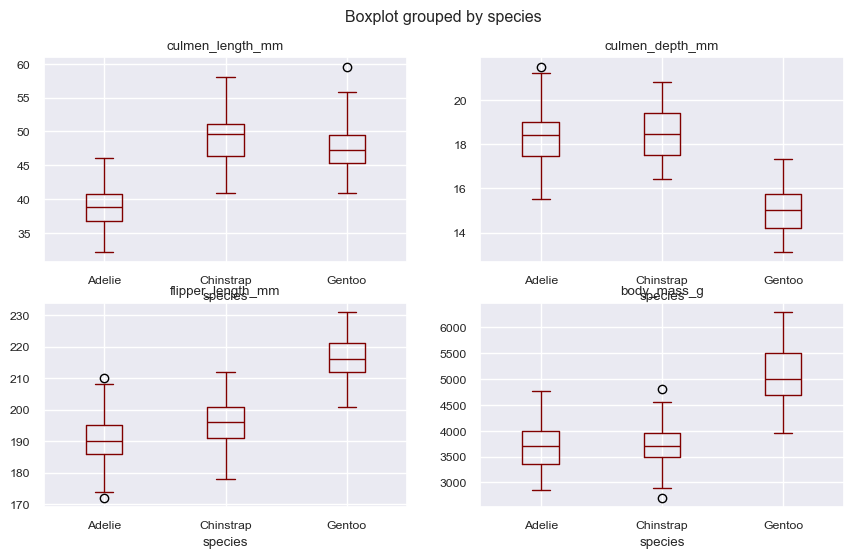

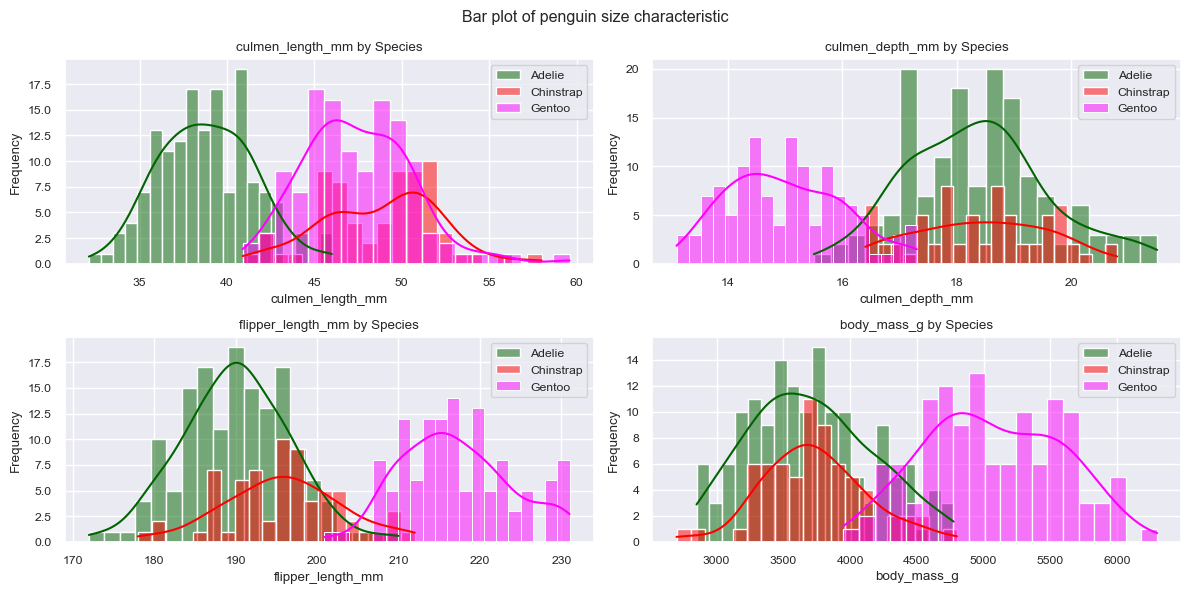

Significancy of Penguin species based on p-value for culmen length: 7.233266188149441e-91
Significancy of Penguin species based òn p-value for culmen depth: 5.425943065513267e-84
Significancy of Penguin species based on p-value for flipper length: 2.2113941068282237e-110
Significancy of Penguin species based o p-value for body mass: 1.0069770504490335e-81


In [21]:
# Group data by species
penguin_df = pd.read_csv('penguins_size.csv')
columns_df = penguin_df.select_dtypes(include=['number']).columns
penguin_df[columns_df] = penguin_df[columns_df].fillna(penguin_df[columns_df].mean())

group_penguin = penguin_df.groupby('species')

# Calculate summary statistics
summary_stats = group_penguin.agg({
    'culmen_length_mm': [np.mean, np.std, np.min, np.max],
    'culmen_depth_mm': [np.mean, np.std, np.min, np.max],
    'flipper_length_mm': [np.mean, np.std, np.min, np.max],
    'body_mass_g': [np.mean, np.std, np.min, np.max]
})

# Creating boxplot for each measurement of  penguin species
fig, axes = plt.subplots(2, 2, figsize=(10, 6))
fig.suptitle("Penguin Measurements by Species")


axes[0, 0].set_title("Culmen Length (mm)")
penguin_df.boxplot(column='culmen_length_mm', by='species', ax=axes[0, 0], color = 'maroon')

axes[0, 1].set_title("Culmen Depth (mm)")
penguin_df.boxplot(column='culmen_depth_mm', by='species', ax=axes[0, 1], color = 'maroon')

axes[1, 0].set_title("Flipper Length (mm)")
penguin_df.boxplot(column='flipper_length_mm', by='species', ax=axes[1, 0], color = 'maroon')

# Box plots for body mass
axes[1, 1].set_title("Body Mass (g)")
penguin_df.boxplot(column='body_mass_g', by='species', ax=axes[1, 1],  color = 'maroon')


# Determining the significant different between species type
def anova(penguin_df, column_name):
    f_stat, p_value = stats.f_oneway(
        penguin_df.get_group('Adelie')[column_name],
        penguin_df.get_group('Gentoo')[column_name],
        penguin_df.get_group('Chinstrap')[column_name]
    )
    return p_value

# using Anova to analyze the significancy
culmen_length_p_value = anova(group_penguin, 'culmen_length_mm')
culmen_depth_p_value = anova(group_penguin, 'culmen_depth_mm')
flipper_length_p_value = anova(group_penguin, 'flipper_length_mm')
body_mass_p_value = anova(group_penguin, 'body_mass_g')

Columns_feature = ['culmen_length_mm', 'culmen_depth_mm', 'flipper_length_mm', 'body_mass_g']

colors = ['darkgreen', 'red', 'magenta']

fig, axes = plt.subplots(2, 2, figsize=(12, 6))
fig.suptitle('Bar plot of penguin size characteristic')

for i, ax in enumerate(axes.flatten()):
    measurement = Columns_feature[i]
    ax.set_title(f"{measurement} by Species")
    
    for j, (species, df_species) in enumerate(group_penguin):
        color = colors[j]
        sns.histplot(df_species[measurement], bins=20, label=species, ax=ax, kde=True, color=color)
    
    ax.set_xlabel(measurement)
    ax.set_ylabel("Frequency")
    ax.legend()
    ax.grid(True)

plt.tight_layout()
plt.show()
# Print ANOVA results
print(f'Significancy of Penguin species based on p-value for culmen length: {culmen_length_p_value}')
print(f'Significancy of Penguin species based òn p-value for culmen depth: {culmen_depth_p_value}')
print(f'Significancy of Penguin species based on p-value for flipper length: {flipper_length_p_value}')
print(f'Significancy of Penguin species based o p-value for body mass: {body_mass_p_value}')

In [22]:
data

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.10000,18.70000,181.000000,3750.000000,MALE
1,Adelie,Torgersen,39.50000,17.40000,186.000000,3800.000000,FEMALE
2,Adelie,Torgersen,40.30000,18.00000,195.000000,3250.000000,FEMALE
3,Adelie,Torgersen,43.92193,17.15117,200.915205,4201.754386,NaN
4,Adelie,Torgersen,36.70000,19.30000,193.000000,3450.000000,FEMALE
...,...,...,...,...,...,...,...
339,Gentoo,Biscoe,43.92193,17.15117,200.915205,4201.754386,.
340,Gentoo,Biscoe,46.80000,14.30000,215.000000,4850.000000,FEMALE
341,Gentoo,Biscoe,50.40000,15.70000,222.000000,5750.000000,MALE
342,Gentoo,Biscoe,45.20000,14.80000,212.000000,5200.000000,FEMALE


In [23]:
penguin_df

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.10000,18.70000,181.000000,3750.000000,MALE
1,Adelie,Torgersen,39.50000,17.40000,186.000000,3800.000000,FEMALE
2,Adelie,Torgersen,40.30000,18.00000,195.000000,3250.000000,FEMALE
3,Adelie,Torgersen,43.92193,17.15117,200.915205,4201.754386,NaN
4,Adelie,Torgersen,36.70000,19.30000,193.000000,3450.000000,FEMALE
...,...,...,...,...,...,...,...
339,Gentoo,Biscoe,43.92193,17.15117,200.915205,4201.754386,.
340,Gentoo,Biscoe,46.80000,14.30000,215.000000,4850.000000,FEMALE
341,Gentoo,Biscoe,50.40000,15.70000,222.000000,5750.000000,MALE
342,Gentoo,Biscoe,45.20000,14.80000,212.000000,5200.000000,FEMALE


3.e)

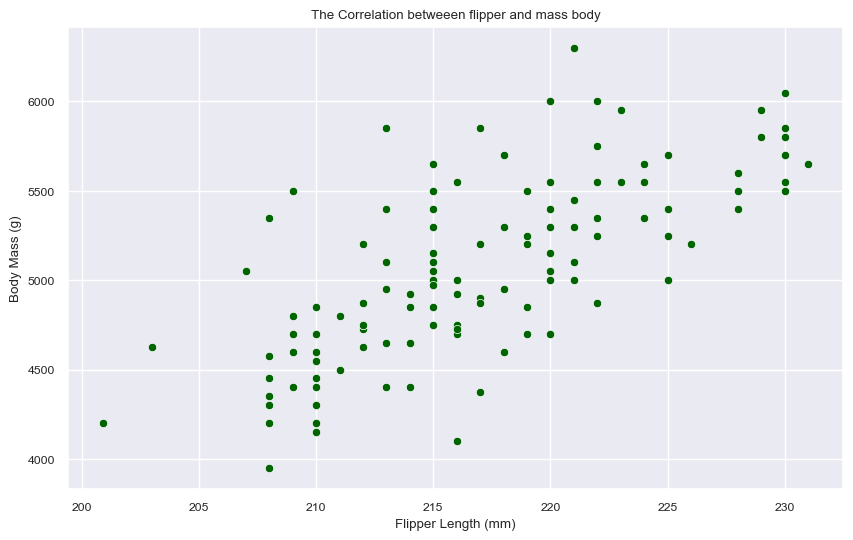

The correlation betweeen flipper and mass body is 0.7112091081083242


In [24]:
#Determining the correlation between two measurement of penguin species

species_data = data[data['species'] == species]
    
# Calculate the correlation for the  species
measure_corr = species_data['flipper_length_mm'].corr(species_data['body_mass_g'])
    
# Create a scatter plot
plt.figure(figsize=(10, 6))
sns.scatterplot(data=species_data, x='flipper_length_mm', y='body_mass_g', color = 'darkgreen')
plt.title(f'The Correlation betweeen flipper and mass body')
plt.xlabel('Flipper Length (mm)')
plt.ylabel('Body Mass (g)')
plt.show()
print(f'The correlation betweeen flipper and mass body is {measure_corr}')

3.f)

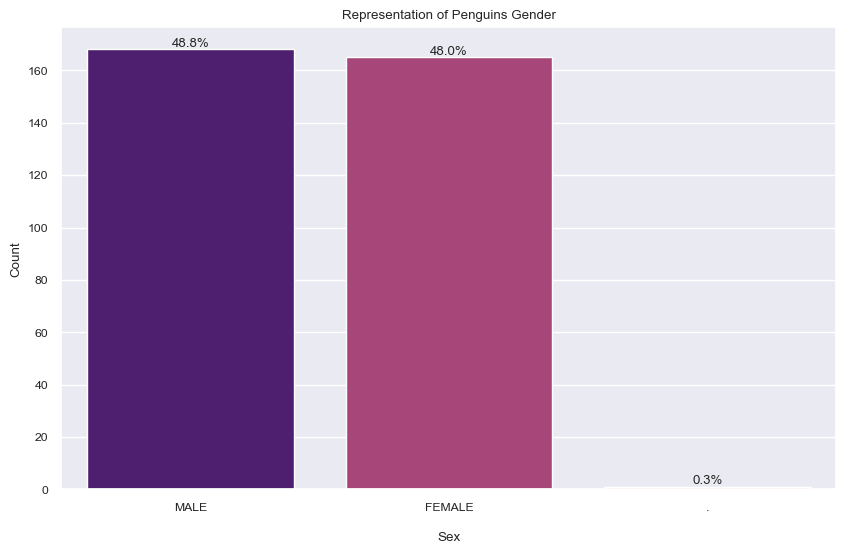

In [25]:
#Plotting bar graph to analyze whether all gender are even represented 
plt.figure(figsize=(10, 6))
ax = sns.countplot(x='sex', data=data, palette='magma')
plt.title('Representation of Penguins Gender')
plt.xlabel('\nSex')
plt.ylabel('Count')
# Annotating the percentage of each sex
total = len(data)  
for i in ax.patches:
    height = i.get_height()
    percentage = (height / total) * 100
    ax.annotate(f'{percentage:.1f}%', (i.get_x() + i.get_width() / 2, height),
                ha='center', va='bottom')

plt.show()

3.g)

TypeError: Data source must be a DataFrame or Mapping, not <class 'pandas.core.series.Series'>.

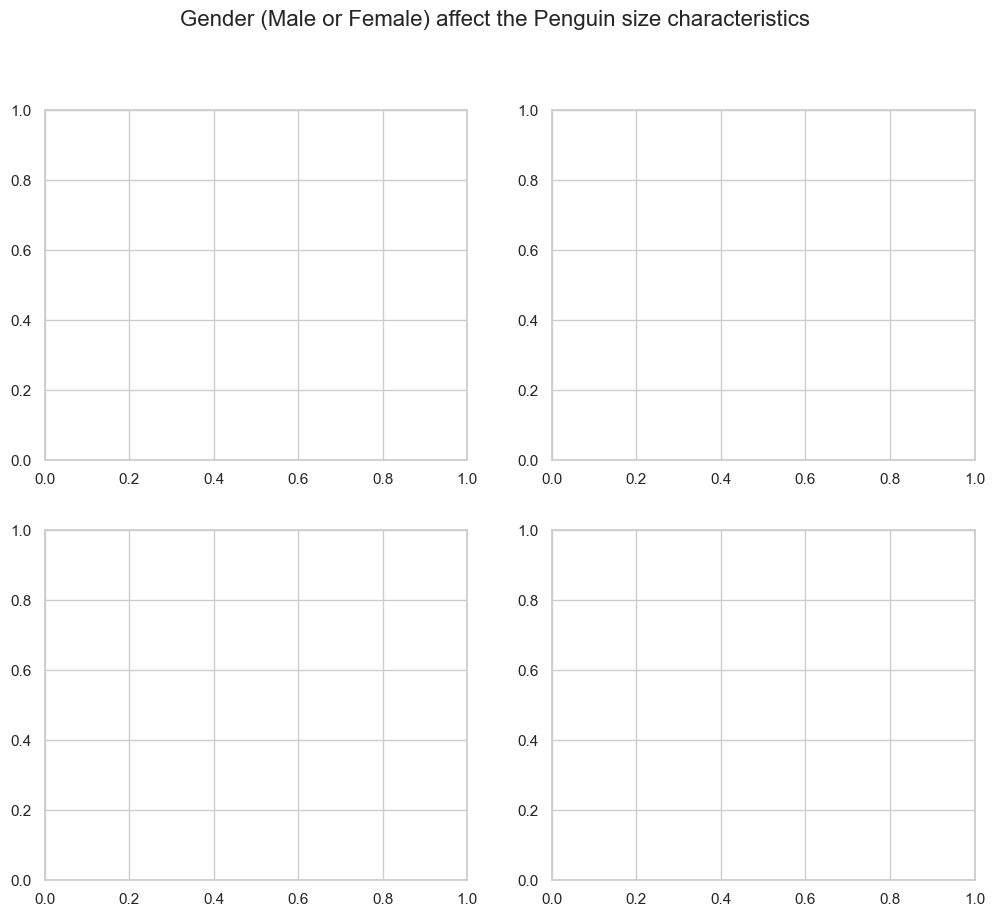

In [31]:
sns.set(style="whitegrid")
data.dropna()
# Create subplots for each measurement
fig, axes = plt.subplots(2, 2, figsize=(12, 10))
fig.suptitle('Gender (Male or Female) affect the Penguin size characteristics', fontsize=16)

# Bar plots for culmen length
sns.barplot(x='species', y='culmen_length_mm', hue='sex', data=data, ax=axes[0, 0])
axes[0, 0].set_title("Culmen Length (mm)")

# Bar plots for culmen depth
sns.barplot(x='species', y='culmen_depth_mm', hue='sex', data=data, ax=axes[0, 1])
axes[0, 1].set_title("Culmen Depth (mm)")

# Bar plots for flipper length
sns.barplot(x='species', y='flipper_length_mm', hue='sex', data=data, ax=axes[1, 0])
axes[1, 0].set_title("Flipper Length (mm)")

# Bar plots for body mass
sns.barplot(x='species', y='body_mass_g', hue='sex', data=data, ax=axes[1, 1])
axes[1, 1].set_title("Body Mass (g)")

plt.tight_layout(rect=[0, 0, 1, 0.95])  # Adjust layout to prevent title cutoff
plt.show()


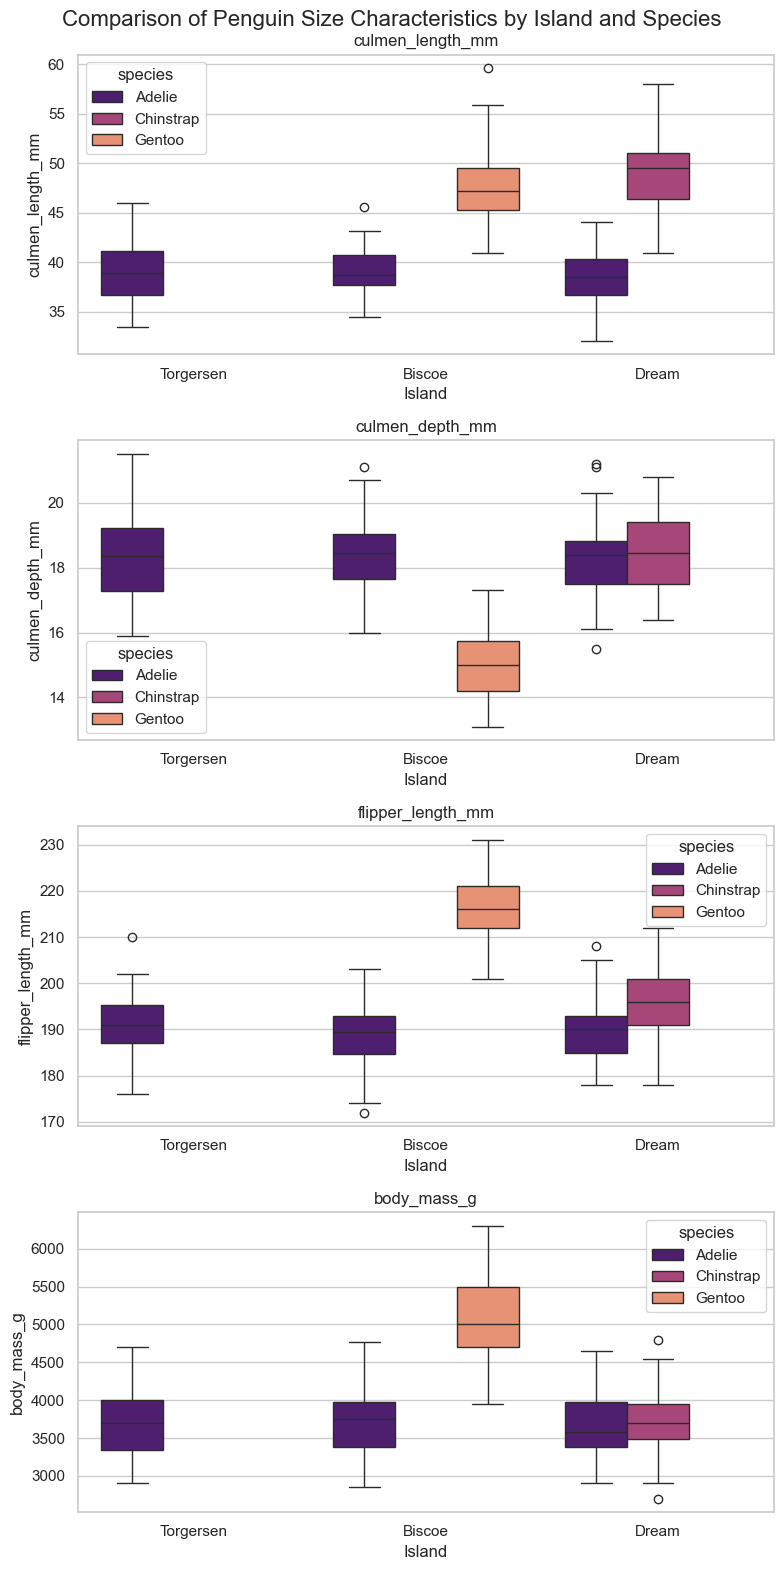

In [27]:
# Define the measurements of interest
features = ['culmen_length_mm', 'culmen_depth_mm', 'flipper_length_mm', 'body_mass_g']

# Create subplots for each measurement
fig, axes = plt.subplots(len(features), 1, figsize=(8, 16))
fig.suptitle("Comparison of Penguin Size Characteristics by Island and Species", fontsize=16)

# Iterate through each measurement
for i, measurement in enumerate(features):
    ax = axes[i]
    ax.set_title(measurement)
    ax.set_xlabel('Island')
    ax.set_ylabel(measurement)

    # Create box plots for each measurement and island, differentiate by species
    sns.boxplot(x='island', y=measurement, hue='species', data=penguin_df, ax=ax, palette='magma')

plt.tight_layout()
plt.show()


In [28]:
for measurement in features:
    data = penguin_df[measurement]

    # Calculate the quartiles and IQR
    Q1 = data.quantile(0.25)
    Q3 = data.quantile(0.75)
    IQR = Q3 - Q1

    # Set the outlier threshold
    threshold = 1.5 * IQR

    # Identify outliers using the IQR method
    outliers = data[(data < Q1 - threshold) | (data > Q3 + threshold)]

    # Print the outliers
    print(f"Outliers in {measurement}:")
    print(outliers)
    print()

Outliers in culmen_length_mm:
Series([], Name: culmen_length_mm, dtype: float64)

Outliers in culmen_depth_mm:
Series([], Name: culmen_depth_mm, dtype: float64)

Outliers in flipper_length_mm:
Series([], Name: flipper_length_mm, dtype: float64)

Outliers in body_mass_g:
Series([], Name: body_mass_g, dtype: float64)

